**EEP 153 Project 1: Team Becker**

**Import libraries**

In [ ]:
!pip install wbdata
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
cf.go_offline()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**[#A] Population function**

In [ ]:
# Returns the answer to "In [year] how many [people/males/females] 
# aged [low] to [high] were living in [the world/region/country]?"

# age_range will be converted to aggregated in 5-year intervals. For ex, 
# inputted range of (4,66) will show population numbers ages (0,70) 
# in intervals (0,4)+(5,9)+...+(66,70)

def population(year, sex, age_range, place):
    
    # age must be larger than 0
    if age_range[0]<0: return "Age must be larger than 0."
    # sex must be 'Male', 'Female', or 'People'
    if sex!='Male' and sex!='Female' and sex!='People': return "Sex must be either 'Male', 'Female', or 'People'."
    
    
    # defining age_range in 5-year intervals
    low = int(np.floor(age_range[0]/5)*5)
    high = age_range[1]
    
    # string list of age ranges
    age_ranges = []
    if high >= 80: # population cuts off at '80UP' interval
        for i in range(low,80,5):
            age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
        age_ranges.append("80UP")
    else:
        for i in range(low,high,5):
            age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    
    # convert string list to dictionary of indicator names
    male_variables = {"SP.POP."+age_range+".MA":"male "+age_range for age_range in age_ranges}
    female_variables = {"SP.POP."+age_range+".FE":"female "+age_range for age_range in age_ranges}
    if sex == 'Male':
        variables = male_variables
    else: # sex is either Female or all people
        variables = female_variables
        if sex == 'People':
            variables.update(male_variables)
    
    # checking for invalid place
    try: df = wbdata.get_dataframe(variables,country=place)
    except: return "Please enter a valid 3-letter 'place' code."
    
    df.reset_index(inplace=True) 
    df['date'] = df['date'].astype('int')
    
    # checking for valid year in dataset
    if year not in df[['date']].values:
        return "No data available for this year."
    df = df.loc[df['date']==year].drop(columns=['date'])
    
    population = df.sum(axis=1)
    return population


In [ ]:
population(year=2000,sex='Male',age_range=(0,100),place='WLD')

21    3.088841e+09
dtype: float64

In [ ]:
assert population(year=2010,sex='Male',age_range=(0,100),place='WLD').item() > 7e9/2

# **Population Deliverables**

**[#A] Population Dataframe**

In [ ]:
# Returns a dataframe indexed by region/country and year, with columns
# giving counts of people in different age-sex groups.

def population_df(places):
    
    # string list of age ranges
    age_ranges = []
    for i in range(0,80,5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    age_ranges.append("80UP")
    
    # convert string list to dictionary of indicator names
    male_variables = {"SP.POP."+age_range+".MA":"male "+age_range for age_range in age_ranges}
    female_variables = {"SP.POP."+age_range+".FE":"female "+age_range for age_range in age_ranges}
    variables = male_variables
    variables.update(female_variables)
    
    # checking for invalid place
    try: df = wbdata.get_dataframe(variables,country=places).astype('int')
    except: return "Please enter a valid 3-letter 'place' code."
    

    
    return df

In [ ]:
population_df(places=["NGA","JPN"])

male 0004  male 0509  male 1014  male 1519  male 2024  \
country date                                                          
Japan   2021    2210561    2590484    2767008    2890482    3112083   
        2020    2284879    2625371    2783159    2943234    3110606   
        2019    2370060    2657859    2788713    2991901    3113830   
        2018    2454725    2688024    2793950    3024466    3120423   
        2017    2528765    2715845    2806618    3049628    3115632   
...                 ...        ...        ...        ...        ...   
Nigeria 1964    4202217    3185563    2707801    2485472    2218065   
        1963    4093629    3108218    2636850    2483991    2168035   
        1962    3989776    3033074    2593407    2456694    2121144   
        1961    3891848    2960904    2571659    2409002    2075614   
        1960    3799794    2891907    2558128    2355247    2030370   

              male 2529  male 3034  male 3539  male 4044  male 4549  ...  \
country date                                                         ...   
Japan   2021    3143934    3300030    3609487    4125694    4906287  ...   
        2020    3148065    3353821    3673190    4290148    4930324  ...   
        2019    3148506    3428920    3748589    4468006    4877560  ...   
        2018    3167427    3498610    3842640    4655399    4767825  ...   
        2017    3216747    3554102    3961894    4813261    4670379  ...   
...                 ...        ...        ...        ...        ...  ...   
Nigeria 1964    1898304    1611209    1375581    1166440     960892  ...   
        1963    1853427    1575747    1348324    1141709     934904  ...   
        1962    1808505    1541768    1321554    1116917     908769  ...   
        1961    1765490    1509504    1295079    1091552     884091  ...   
        1960    1725750    1479232    1268974    1065556     861795  ...   

              female 3539  female 4044  female 4549  female 5054  female 5559  \
country date                                                                    
Japan   2021      3494747      4008616      4789841      4424575      3939566   
        2020      3563080      4168331      4818401      4259599      3934988   
        2019      3639190      4341833      4772006      4192166      3850974   
        2018      3730407      4523228      4670902      4108843      3794407   
        2017      3844210      4677406      4584189      3985603      3752523   
...                   ...          ...          ...          ...          ...   
Nigeria 1964      1359456      1159689       976307       804670       663757   
        1963      1332875      1136889       953104       789303       651267   
        1962      1307163      1114322       929948       775495       639259   
        1961      1281978      1091418       908044       762081       628879   
        1960      1257405      1068132       888171       748613       621071   

              female 6064  female 6569  female 7074  female 7579  female 80UP  
country date                                                                   
Japan   2021      3708968      4013750      5100921      3908551      8083764  
        2020      3731605      4205901      4929367      4027886      7900294  
        2019      3764240      4487336      4659820      4036813      7732333  
        2018      3799810      4837512      4378436      3908449      7557496  
        2017      3891478      5140469      4136044      3772362      7355392  
...                   ...          ...          ...          ...          ...  
Nigeria 1964       531941       416106       271954       144808        78608  
        1963       529073       410313       265692       140976        76390  
        1962       527780       403294       259460       137360        74330  
        1961       526096       395680       253218       133819        72305  
        1960       522637       388051       247046       130391        70303  

[124 r

**[#B] Population Pyramids**

In [ ]:
# Takes in a population dataframe (includes the population history of each age-sex group for one country)
# and produces a population pyramid for specified year

def population_pyramid(pop_df, year, country_id):

    configure_plotly_browser_state()
    # string list of age ranges
    age_ranges = []
    for i in range(0,80,5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    age_ranges.append("80UP")


    py.init_notebook_mode(connected=True) 
    layout = go.Layout(barmode='overlay',
                       yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                       xaxis=go.layout.XAxis(title='Number'),
                       title="Population pyramid for "+country_id+" in "+str(year))
    
    bins = [go.Bar(x = pop_df.loc[str(year),:].filter(regex="male").values,
                   y = [int(s[:2])+1 for s in age_ranges],
                   orientation='h',
                   name='Men',
                   marker=dict(color='purple'),
                   hoverinfo='skip'
                   ),

            go.Bar(x = -pop_df.loc[str(year),:].filter(regex="female").values,
                   y=[int(s[:2])+1 for s in age_ranges],
                   orientation='h',
                   name='Women',
                   marker=dict(color='pink'),
                   hoverinfo='skip',
                   )
            ]

    py.iplot(dict(data=bins, layout=layout))

In [ ]:
population_pyramid(population_df(places="JPN"), 2021, 'JPN')

In [ ]:
population_pyramid(population_df(places="NGA"), 2021, 'NGA')

**[#C] Animated Population Pyramids**

In [ ]:
def animated_pp(pop_df, start_year, end_year, country_id):
    years = range(start_year, end_year+1, 1)

    configure_plotly_browser_state()
    
    age_ranges = []
    for i in range(0,80,5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    age_ranges.append("80UP")

    py.init_notebook_mode(connected=True)

    def create_layout(year):
        lo = go.Layout(
        barmode='overlay',
        yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
        xaxis=go.layout.XAxis(range=[-pop_df.values.max()-500000, pop_df.values.max()+500000],title='Number'),
        title="Population pyramid for "+country_id+" in "+str(year))
        return lo
    
    def create_bin(year):
        bins = [go.Bar(x = pop_df.loc[str(year),:].filter(regex="male").values,
                   y = [int(s[:2])+1 for s in age_ranges],
                   orientation='h',
                   name='Men',
                   marker=dict(color='#94bde8'),
                   hoverinfo='skip'
                   ),

            go.Bar(x = -pop_df.loc[str(year),:].filter(regex="female").values,
                   y=[int(s[:2])+1 for s in age_ranges],
                   orientation='h',
                   name='Women',
                   marker=dict(color='pink'),
                   hoverinfo='skip',
                   )
            ]
        return bins
    
    fig = go.Figure(
    data=create_bin(years[0]),
    layout=go.Layout(
        barmode='overlay',
        yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
        xaxis=go.layout.XAxis(range=[-pop_df.values.max()-500000, pop_df.values.max()+500000], title='Number'),
        title="Population pyramid for "+country_id+" in "+str(years[0]),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 100}, 
                                                              "transition": {"duration": 0}}])])]
    ),
    frames=[go.Frame(data = create_bin(year), layout = create_layout(year))for year in years]
)
    
    fig.show()


#### Animated Population Pyramid for Japan

In [ ]:
dataset_jpn = population_df(places=["JPN"])
animated_pp(dataset_jpn, 1960, 2021, 'JPN')

#### Animated Population Pyramid for Nigeria

In [ ]:
dataset_nga = population_df(places=["NGA"])
animated_pp(dataset_nga, 1960, 2021, 'NGA')

**[#C] Map Visualizations**

# **Specific data exploration for our project**

**Plotting variables JPN vs NGA**

In [ ]:
# Returns a dataframe of the historic difference between JPN and NGA for a given indicator
# Takes in the id ("code") of the indicator along with its associated name
def indicators_df(code,name):
    variable_labels = {code:name}

    JPN = wbdata.get_dataframe(variable_labels, country="JPN")
    NGA = wbdata.get_dataframe(variable_labels, country="NGA")

    # Change dataframe
    world = pd.concat([JPN, NGA], axis=1)
    world.columns = ["JPN","NGA"]
    world.index = world.index.astype(int)
    world.reset_index(inplace=True)

    return world

In [ ]:
# Plots the historic difference between JPN and NGA for a given indicator
# Takes in the id ("code") of the indicator along with its associated name
def plot_indicators(code,name):
    world = indicators_df(code,name)

    date = world['date'].values
    jpn = world['JPN'].values
    nga = world['NGA'].values

    plt.figure(figsize=(14,9))
    plt.plot(date,jpn)
    plt.plot(date,nga)
    plt.title(name,fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Variable")
    plt.ylim(ymin=0)
    plt.legend(["JPN","NGA"])

In [ ]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [ ]:
code = "HD.HCI.OVRL"
name = "Human Capital Index (HCI) (scale 0-1)"
world = indicators_df(code,name)
world.head(100)

,date,JPN,NGA
0,2020,0.804714,0.360610
1,2019,NaN,NaN
2,2018,0.840709,0.354753
3,2017,0.844000,0.342000
4,2016,NaN,NaN
5,2015,NaN,NaN
6,2014,NaN,NaN
7,2013,NaN,NaN
8,2012,NaN,NaN
9,2011,NaN,NaN


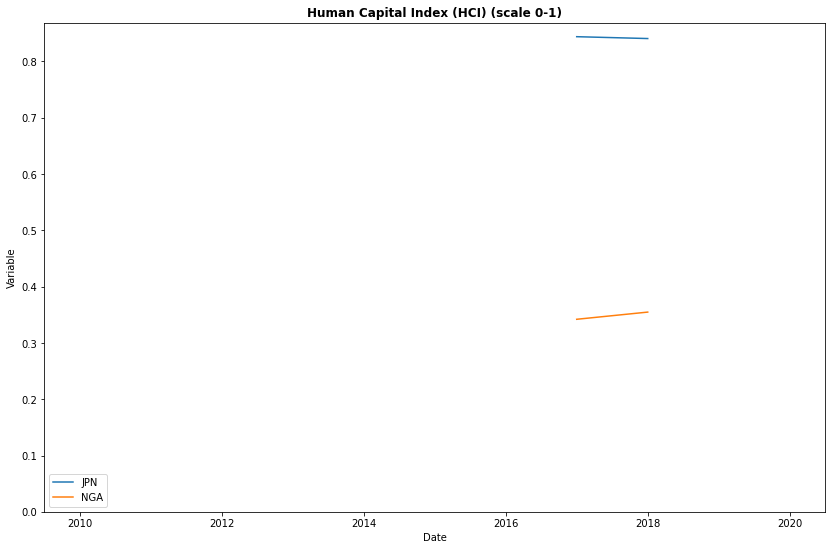

In [ ]:
plot_indicators(code,name)

## **Economy**

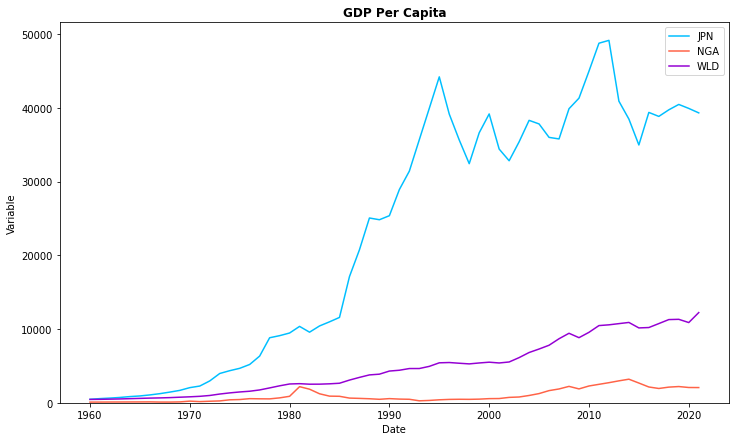

In [ ]:
# Plot with world data
def indicators_df_wld(code,name):
    variable_labels = {code:name}

    JPN = wbdata.get_dataframe(variable_labels, country="JPN")
    NGA = wbdata.get_dataframe(variable_labels, country="NGA")
    WLD = wbdata.get_dataframe(variable_labels, country="WLD")

    # Change dataframe
    world = pd.concat([JPN, NGA, WLD], axis=1)
    world.columns = ["JPN","NGA", 'WLD']
    world.index = world.index.astype(int)
    world.reset_index(inplace=True)

    return world


def plot_indicators_wld(code,name):
    world = indicators_df_wld(code,name)

    date = world['date'].values
    jpn = world['JPN'].values
    nga = world['NGA'].values
    wld = world['WLD'].values

    plt.figure(figsize=(12,7))
    plt.plot(date,jpn, color = 'deepskyblue')
    plt.plot(date,nga, color = 'tomato')
    plt.plot(date,wld, color = 'darkviolet')
    plt.title(name,fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Variable")
    plt.ylim(ymin=0)
    plt.legend(["JPN","NGA", "WLD"])

# GDP per Capita plot including world
plot_indicators_wld('NY.GDP.PCAP.CD', 'GDP Per Capita')

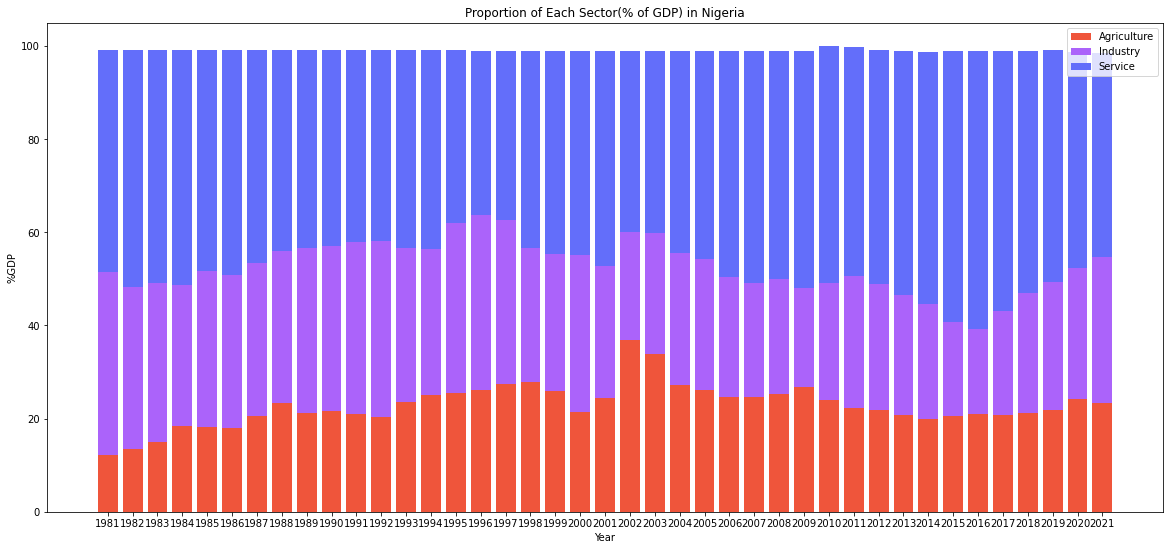

In [ ]:
# Stacked bar plot for Nigeria Economy
vars_gdp_nga = {"NV.AGR.TOTL.ZS":"Agriculture, forestry, and fishing, value added (% of GDP)",
       "NV.IND.TOTL.ZS":"Industry (including construction), value added (% of GDP)",
       "NV.SRV.TOTL.ZS": "Services, value added (% of GDP)"}

gdp_nga = wbdata.get_dataframe(vars_gdp_nga, country=['NGA'])
gdp_nga = gdp_nga.dropna().sort_index(ascending = True)

plt.figure(figsize=(20,9))
plt.bar(gdp_nga.index, gdp_nga.iloc[:, 0], color='#EF553B')
plt.bar(gdp_nga.index, gdp_nga.iloc[:, 1], bottom=gdp_nga.iloc[:, 0], color='#AB63FA')
plt.bar(gdp_nga.index, gdp_nga.iloc[:, 2], bottom=gdp_nga.iloc[:, 0]+gdp_nga.iloc[:, 1], color='#636EFA')
plt.xlabel("Year")
plt.ylabel("%GDP")
plt.legend(["Agriculture", "Industry", "Service"])
plt.title("Proportion of Each Sector(% of GDP) in Nigeria")
plt.show()

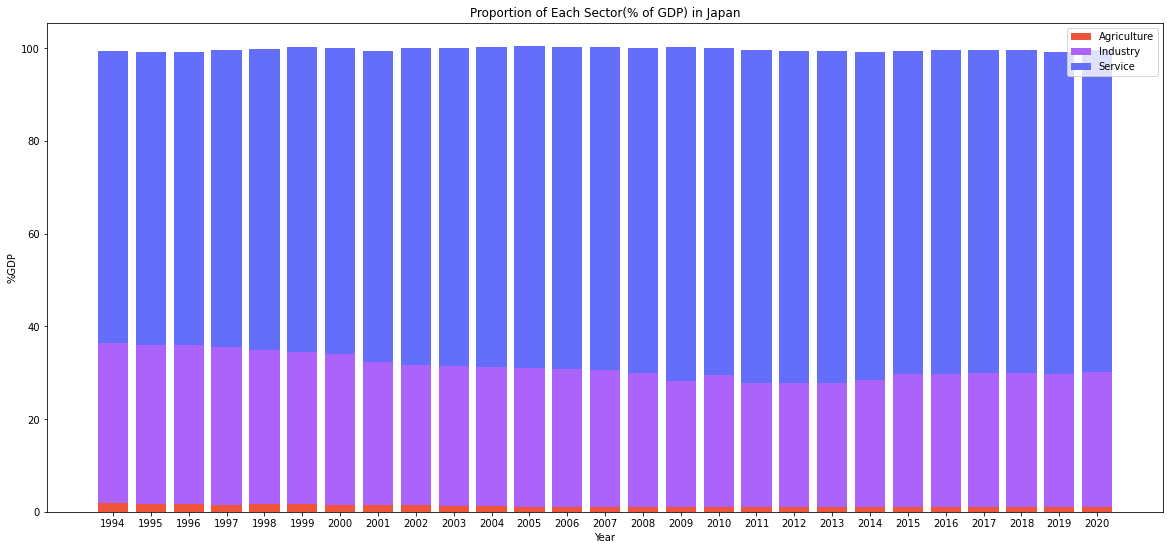

In [ ]:
#Stacked bar plot for Japan Economy
vars_gdp_jpn = {"NV.AGR.TOTL.ZS":"Agriculture, forestry, and fishing, value added (% of GDP)",
       "NV.IND.TOTL.ZS":"Industry (including construction), value added (% of GDP)",
       "NV.SRV.TOTL.ZS": "Services, value added (% of GDP)"}

gdp_jpn = wbdata.get_dataframe(vars_gdp_jpn, country=['JPN'])
gdp_jpn = gdp_jpn.dropna().sort_index(ascending = True)

plt.figure(figsize=(20,9))
plt.bar(gdp_jpn.index, gdp_jpn.iloc[:, 0], color='#EF553B')
plt.bar(gdp_jpn.index, gdp_jpn.iloc[:, 1], bottom=gdp_jpn.iloc[:, 0], color='#AB63FA')
plt.bar(gdp_jpn.index, gdp_jpn.iloc[:, 2], bottom=gdp_jpn.iloc[:, 0]+gdp_jpn.iloc[:, 1], color='#636EFA')
plt.xlabel("Year")
plt.ylabel("%GDP")
plt.legend(["Agriculture", "Industry", "Service"])
plt.title("Proportion of Each Sector(% of GDP) in Japan" )
plt.show()

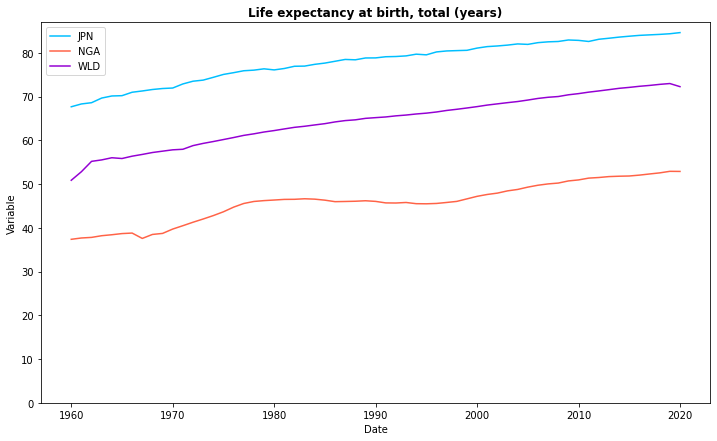

In [ ]:
# Plot for Life Expectancy
plot_indicators_wld('SP.DYN.LE00.IN', 'Life expectancy at birth, total (years)')

## **Health**

In [ ]:
code = "HD.HCI.OVRL"
name = "Human Capital Index (HCI) (scale 0-1)"
world = indicators_df(code,name)
world.head(100)

,date,JPN,NGA
0,2020,0.804714,0.360610
1,2019,NaN,NaN
2,2018,0.840709,0.354753
3,2017,0.844000,0.342000
4,2016,NaN,NaN
5,2015,NaN,NaN
6,2014,NaN,NaN
7,2013,NaN,NaN
8,2012,NaN,NaN
9,2011,NaN,NaN


In [ ]:
code = "SH.DTH.COMM.ZS"
name = "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)"
world = indicators_df(code,name)
world.head(10)

,date,JPN,NGA
0,2021,NaN,NaN
1,2020,NaN,NaN
2,2019,10.296619,65.207891
3,2018,NaN,NaN
4,2017,NaN,NaN
5,2016,NaN,NaN
6,2015,13.154030,66.470006
7,2014,NaN,NaN
8,2013,NaN,NaN
9,2012,NaN,NaN


In [ ]:
code = "SH.DTH.COMM.ZS"
name = "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)"
world = indicators_df(code,name)
world.head(10)

,date,JPN,NGA
0,2021,NaN,NaN
1,2020,NaN,NaN
2,2019,10.296619,65.207891
3,2018,NaN,NaN
4,2017,NaN,NaN
5,2016,NaN,NaN
6,2015,13.154030,66.470006
7,2014,NaN,NaN
8,2013,NaN,NaN
9,2012,NaN,NaN


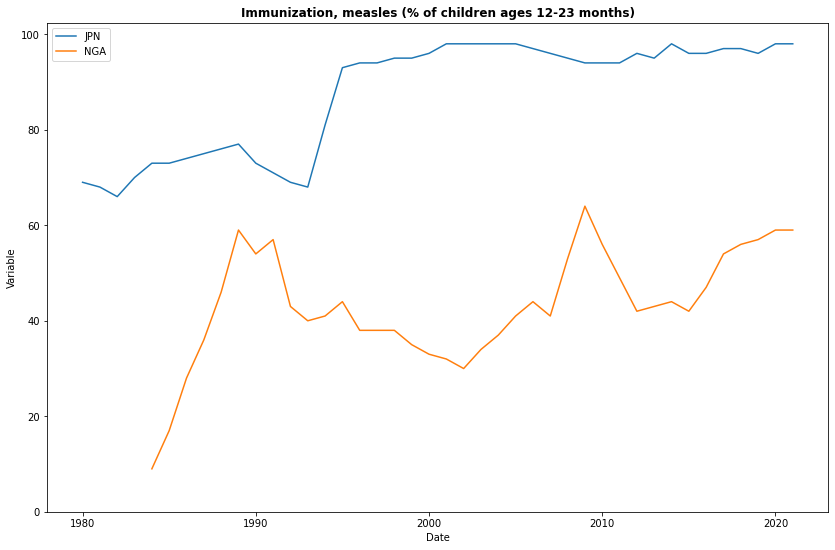

In [ ]:
code = "SH.IMM.MEAS"
name = "Immunization, measles (% of children ages 12-23 months)"
plot_indicators(code,name)

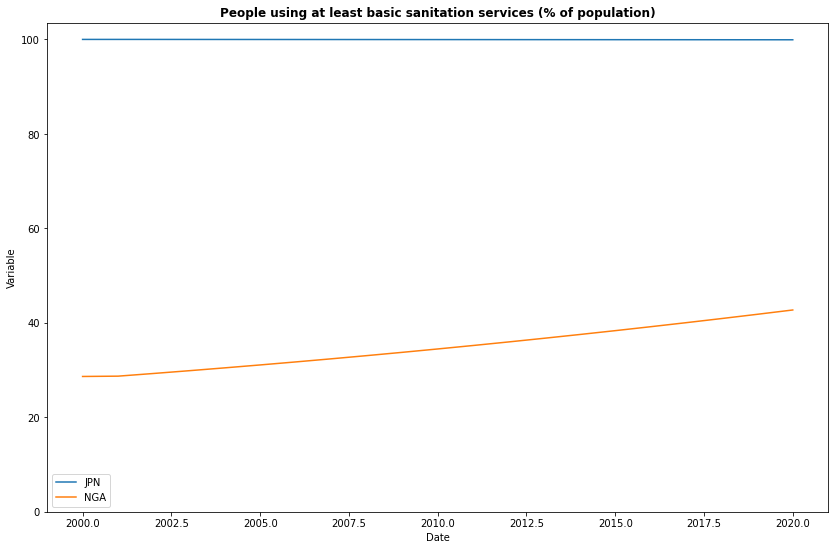

In [ ]:
code = "SH.STA.BASS.ZS"
name = "People using at least basic sanitation services (% of population)"
plot_indicators(code,name)

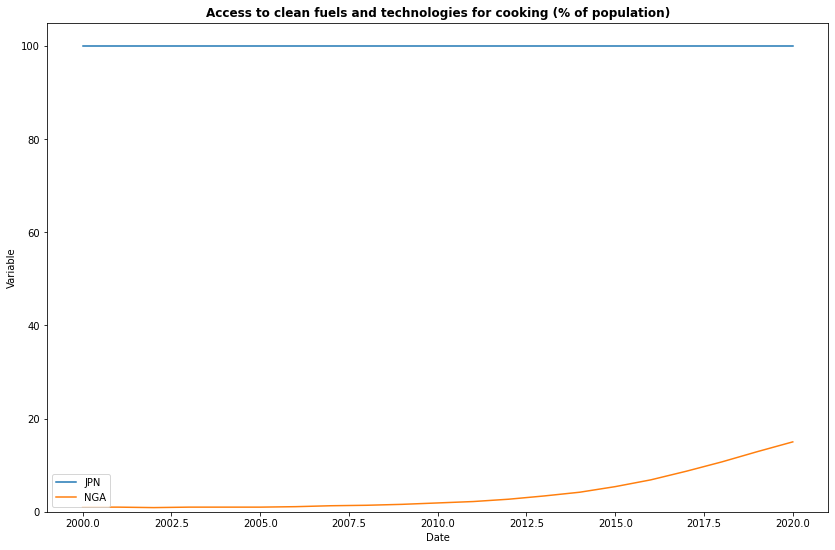

In [ ]:
code = "EG.CFT.ACCS.ZS"
name = "Access to clean fuels and technologies for cooking (% of population)"
plot_indicators(code,name)

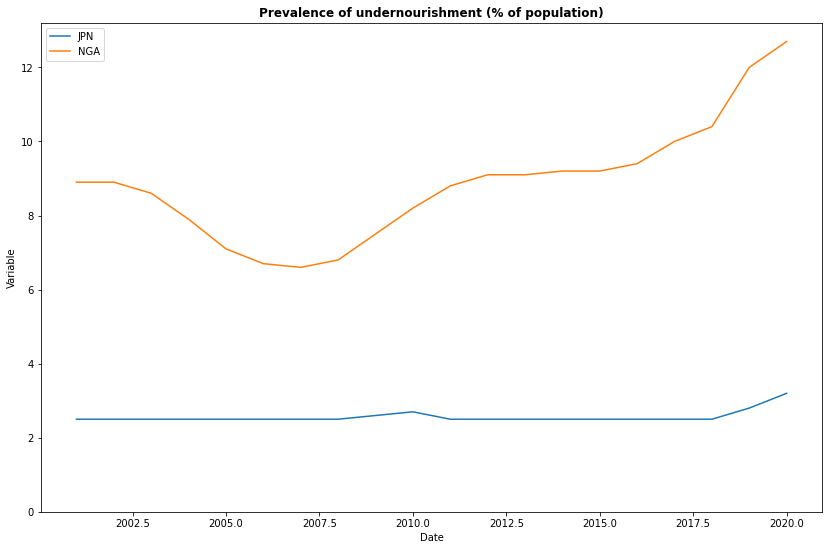

In [ ]:
code = "SN.ITK.DEFC.ZS"
name = "Prevalence of undernourishment (% of population)"
plot_indicators(code,name)

## **Gender**

In [ ]:
SOURCE = 14

indicators = wbdata.get_indicator(source=SOURCE)

In [ ]:
# JPN and NGA Total and Adolescent Fertility Rate Plot Prep

# Labels from indicators SOURCE = 14
variable_labels = {"SP.DYN.CBRT.IN":"Birth rate, crude (per 1,000 people)",
                   "SP.ADO.TFRT":"Adolescent fertility rate (births per 1,000 women ages 15-19)"}

# Creating Birth Rate and Adolescent Fertility Rate Dataframes for JPN and NGA
JPN_BR = wbdata.get_dataframe(variable_labels, country="JPN")
NGA_BR = wbdata.get_dataframe(variable_labels, country="NGA")
JPN_AFR = wbdata.get_dataframe(variable_labels, country="JPN")
NGA_AFR = wbdata.get_dataframe(variable_labels, country="NGA")

JPN_BR = JPN_BR.reset_index()
NGA_BR = NGA_BR.reset_index()
JPN_AFR = JPN_AFR.reset_index()
NGA_AFR = NGA_AFR.reset_index()

# Change dates to an integer
JPN_BR["date"] = JPN_BR["date"].astype(int)
NGA_BR["date"] = NGA_BR["date"].astype(int)
JPN_AFR["date"] = JPN_AFR["date"].astype(int)
NGA_AFR["date"] = NGA_AFR["date"].astype(int)

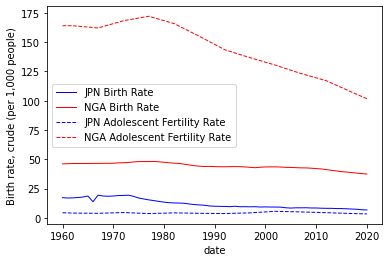

In [ ]:
# Plotting Birth Rates and Adolescent Fertility Rates for JPN and NGA
fig, ax = plt.subplots(figsize=(14,9))

sns.lineplot(data=JPN_BR, x="date", y="Birth rate, crude (per 1,000 people)", label="JPN Birth Rate", color="blue", linewidth=1)
sns.lineplot(data=NGA_BR, x="date", y="Birth rate, crude (per 1,000 people)", label="NGA Birth Rate", color="red", linewidth=1)

sns.lineplot(data=JPN_AFR, x="date", y="Adolescent fertility rate (births per 1,000 women ages 15-19)", label="JPN Adolescent Fertility Rate", color="blue", linewidth=1, linestyle="--")
sns.lineplot(data=NGA_AFR, x="date", y="Adolescent fertility rate (births per 1,000 women ages 15-19)", label="NGA Adolescent Fertility Rate", color="red", linewidth=1, linestyle="--")

In [ ]:
# JPN and NGA Females in Labor Force Plot Prep

# Labels from indicators SOURCE = 14
variable_labels = {"SL.TLF.TOTL.FE.ZS":"Labor force, female (% of total labor force)"}

# Creating Females in Labor Force Dataframes for JPN and NGA
JPN_LF = wbdata.get_dataframe(variable_labels, country="JPN")
NGA_LF = wbdata.get_dataframe(variable_labels, country="NGA")

JPN_LF = JPN_LF.reset_index()
NGA_LF = NGA_LF.reset_index()

# Change dates to an integer
JPN_LF["date"] = JPN_LF["date"].astype(int)
NGA_LF["date"] = NGA_LF["date"].astype(int)

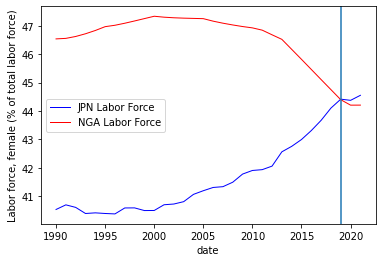

In [ ]:
# Plotting Female in Labor Force for JPN and NGA
fig, ax = plt.subplots(figsize=(14,9))
sns.lineplot(data=JPN_LF, x="date", y="Labor force, female (% of total labor force)", label="JPN Labor Force", color="blue", linewidth=1)
sns.lineplot(data=NGA_LF, x="date", y="Labor force, female (% of total labor force)", label="NGA Labor Force", color="red", linewidth=1)

plt.axvline(x=2019)

## **Agriculture**

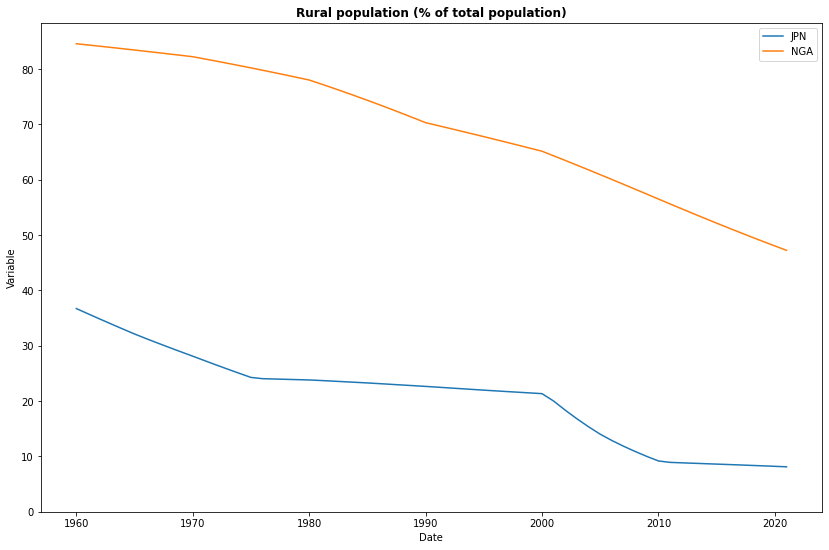

In [ ]:
code = "SP.RUR.TOTL.ZS"
name = "Rural population (% of total population)"
plot_indicators(code,name)

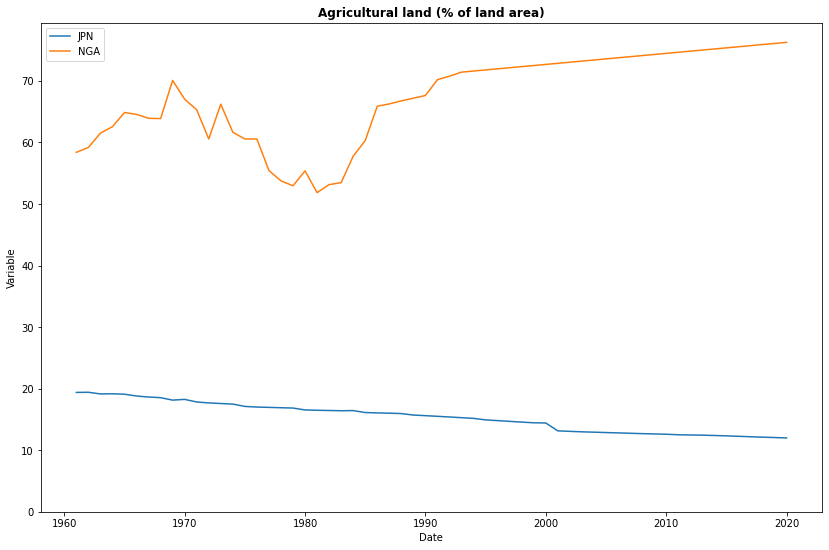

In [ ]:
code = "AG.LND.AGRI.ZS"
name = "Agricultural land (% of land area)"
plot_indicators(code,name)

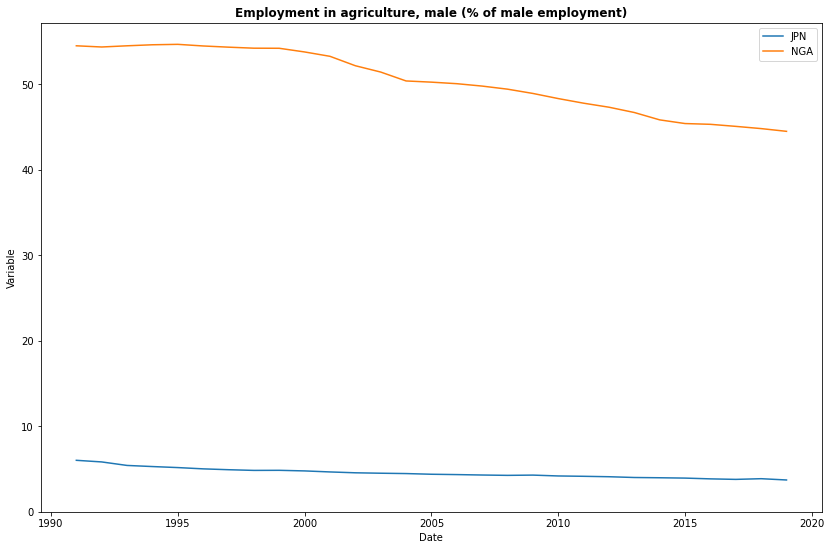

In [ ]:
code = "SL.AGR.EMPL.MA.ZS"
name = "Employment in agriculture, male (% of male employment)"
plot_indicators(code,name)

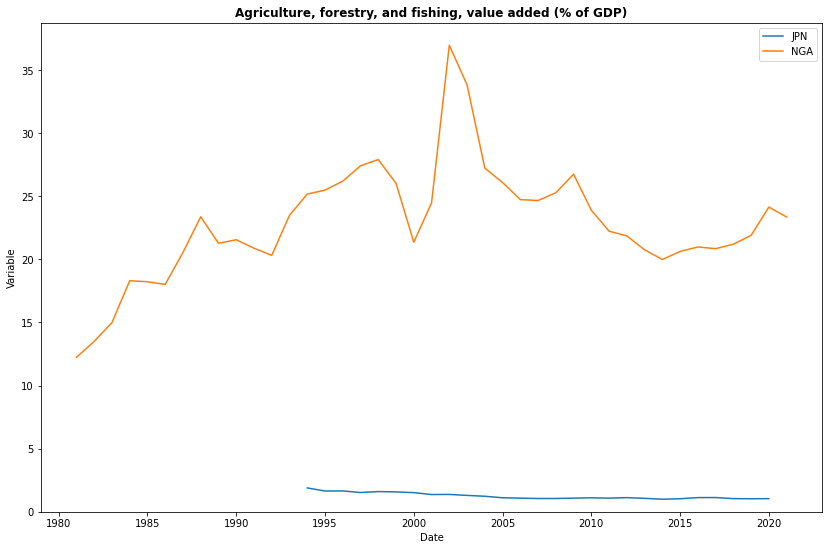

In [ ]:
code = "NV.AGR.TOTL.ZS"
name = "Agriculture, forestry, and fishing, value added (% of GDP)"
plot_indicators(code,name)

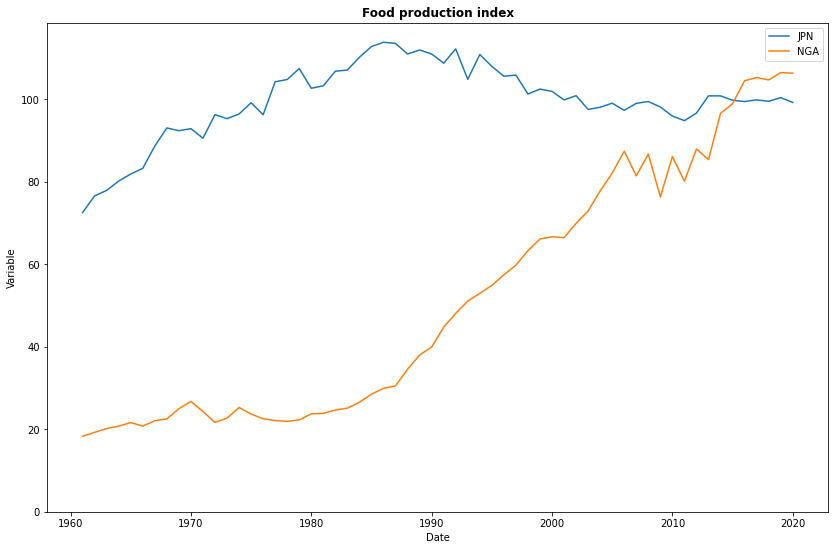

In [ ]:
code = "AG.PRD.FOOD.XD"
name = "Food production index"
plot_indicators(code,name)